# Lab 4 - Recognize named entities
- Write a program to recognize named entities in text
- Learn how to manage a text data set
- Apply recurrent neural networks to text
- Know what word embeddings are

Collecting the Embeddings

In [1]:
filepath = 'glove_6B_100d.txt'
glove_dict = {}
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        line = line.replace("\n", "")
        line = line.split(" ")
        word = line.pop(0)
        line = list(map(float, line))
        glove_dict[word] = line
        


In [2]:
print("the")
print(glove_dict["the"])
print(len(glove_dict["the"]))

the
[-0.038194, -0.24487, 0.72812, -0.39961, 0.083172, 0.043953, -0.39141, 0.3344, -0.57545, 0.087459, 0.28787, -0.06731, 0.30906, -0.26384, -0.13231, -0.20757, 0.33395, -0.33848, -0.31743, -0.48336, 0.1464, -0.37304, 0.34577, 0.052041, 0.44946, -0.46971, 0.02628, -0.54155, -0.15518, -0.14107, -0.039722, 0.28277, 0.14393, 0.23464, -0.31021, 0.086173, 0.20397, 0.52624, 0.17164, -0.082378, -0.71787, -0.41531, 0.20335, -0.12763, 0.41367, 0.55187, 0.57908, -0.33477, -0.36559, -0.54857, -0.062892, 0.26584, 0.30205, 0.99775, -0.80481, -3.0243, 0.01254, -0.36942, 2.2167, 0.72201, -0.24978, 0.92136, 0.034514, 0.46745, 1.1079, -0.19358, -0.074575, 0.23353, -0.052062, -0.22044, 0.057162, -0.15806, -0.30798, -0.41625, 0.37972, 0.15006, -0.53212, -0.2055, -1.2526, 0.071624, 0.70565, 0.49744, -0.42063, 0.26148, -1.538, -0.30223, -0.073438, -0.28312, 0.37104, -0.25217, 0.016215, -0.017099, -0.38984, 0.87424, -0.72569, -0.51058, -0.52028, -0.1459, 0.8278, 0.27062]
100


Cosine similarity

In [3]:
from scipy import spatial

table_vector = glove_dict["table"]
france_vector = glove_dict["france"]
sweden_vector = glove_dict["sweden"]

# Table
def get_close_words(word_vector):
    result_dict = {}
    for k,v in glove_dict.items():
        result = 1 - spatial.distance.cosine(word_vector, v)
        result_dict[k] = result

    top_five = sorted(result_dict, key=result_dict.get, reverse=True)[1:6]
    return top_five

result = get_close_words(table_vector)
print(result)

result = get_close_words(france_vector)
print(result)
      
result = get_close_words(sweden_vector)
print(result)


['tables', 'place', 'bottom', 'room', 'side']
['belgium', 'french', 'britain', 'spain', 'paris']
['denmark', 'norway', 'finland', 'netherlands', 'austria']


### Reading the Corpus and Building Indices

In [4]:
from conll_dictorizer import CoNLLDictorizer, Token

def load_conll2003_en():
    BASE_DIR = ''
    train_file = BASE_DIR + 'NER-data/eng.train'
    dev_file = BASE_DIR + 'NER-data/eng.valid'
    test_file = BASE_DIR + 'NER-data/eng.test'
    column_names = ['form', 'ppos', 'pchunk', 'ner']
    train_sentences = open(train_file, encoding='utf8').read().strip()
    dev_sentences = open(dev_file, encoding='utf8').read().strip()
    test_sentences = open(test_file, encoding='utf8').read().strip()
    return train_sentences, dev_sentences, test_sentences, column_names


train_sentences, val_sentences, test_sentences, column_names = load_conll2003_en()

conll_dict = CoNLLDictorizer(column_names, col_sep=' +')
train_dict = conll_dict.transform(train_sentences)
val_dict = conll_dict.transform(val_sentences)
test_dict = conll_dict.transform(test_sentences)

print(train_dict[0])
print("------")
print(train_dict[1])
print("------")
print(test_dict[1])

[{'form': '-DOCSTART-', 'ppos': '-X-', 'pchunk': 'O', 'ner': 'O'}]
------
[{'form': 'EU', 'ppos': 'NNP', 'pchunk': 'I-NP', 'ner': 'I-ORG'}, {'form': 'rejects', 'ppos': 'VBZ', 'pchunk': 'I-VP', 'ner': 'O'}, {'form': 'German', 'ppos': 'JJ', 'pchunk': 'I-NP', 'ner': 'I-MISC'}, {'form': 'call', 'ppos': 'NN', 'pchunk': 'I-NP', 'ner': 'O'}, {'form': 'to', 'ppos': 'TO', 'pchunk': 'I-VP', 'ner': 'O'}, {'form': 'boycott', 'ppos': 'VB', 'pchunk': 'I-VP', 'ner': 'O'}, {'form': 'British', 'ppos': 'JJ', 'pchunk': 'I-NP', 'ner': 'I-MISC'}, {'form': 'lamb', 'ppos': 'NN', 'pchunk': 'I-NP', 'ner': 'O'}, {'form': '.', 'ppos': '.', 'pchunk': 'O', 'ner': 'O'}]
------
[{'form': 'SOCCER', 'ppos': 'NN', 'pchunk': 'I-NP', 'ner': 'O'}, {'form': '-', 'ppos': ':', 'pchunk': 'O', 'ner': 'O'}, {'form': 'JAPAN', 'ppos': 'NNP', 'pchunk': 'I-NP', 'ner': 'I-LOC'}, {'form': 'GET', 'ppos': 'VB', 'pchunk': 'I-VP', 'ner': 'O'}, {'form': 'LUCKY', 'ppos': 'NNP', 'pchunk': 'I-NP', 'ner': 'O'}, {'form': 'WIN', 'ppos': 'NNP', 

1. Write a function that for each sentence returns the x and y lists of symbols consisting of words and NER tags.
2. Apply this function to your datasets so that you create X and Y lists of lists consisting of words and NER tags 

In [5]:
def get_xy_lists(sentence_list):
    x_word_list = []
    y_stuff_list = []
    for word_item in sentence_list:
        word_item_list = list(word_item.values())
        x_word_list.append(word_item['form'].lower())
        y_stuff_list.append(word_item['ner'])
        
    #print(x_word_list)
    #print(y_stuff_list)
    #print("-----")
    return x_word_list, y_stuff_list
    
def get_xy_lists_of_dictionary(dictionary_list):
    list_X = []
    list_Y = []

    for sentence in dictionary_list:
        x, y = get_xy_lists(sentence)
        list_X.append(x)
        list_Y.append(y)
    
    return list_X, list_Y
    
    
train_X, train_Y = get_xy_lists_of_dictionary(train_dict)

val_X, val_Y = get_xy_lists_of_dictionary(val_dict)
test_X, test_Y = get_xy_lists_of_dictionary(test_dict)

for i in train_X[0:5]:
    print(i)
    
print("---------")
for i in train_Y[0:5]:
    print(i)

print("---------")
for i in test_X[0:5]:
    print(i)

['-docstart-']
['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['peter', 'blackburn']
['brussels', '1996-08-22']
['the', 'european', 'commission', 'said', 'on', 'thursday', 'it', 'disagreed', 'with', 'german', 'advice', 'to', 'consumers', 'to', 'shun', 'british', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.']
---------
['O']
['I-ORG', 'O', 'I-MISC', 'O', 'O', 'O', 'I-MISC', 'O', 'O']
['I-PER', 'I-PER']
['I-LOC', 'O']
['O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
---------
['-docstart-']
['soccer', '-', 'japan', 'get', 'lucky', 'win', ',', 'china', 'in', 'surprise', 'defeat', '.']
['nadim', 'ladki']
['al-ain', ',', 'united', 'arab', 'emirates', '1996-12-06']
['japan', 'began', 'the', 'defence', 'of', 'their', 'asian', 'cup', 'title', 'with', 'a', 'lucky', '2

 Create a vocabulary of all the words observed in the training set and the words in GloVe. 

In [6]:

glove_set = set()
train_set = set()

for k in glove_dict:
    glove_set.add(k)
    
for sen in train_X:
    for word in sen:
        train_set.add(word)

        
print("Glove : " , len(glove_dict))
print("Train : " , len(train_X))
inter_vocab_set = glove_set.intersection(train_set)
union_vocab_set = glove_set.union(train_set)
print("Intersection : " , len(inter_vocab_set))
print("Union : " , len(union_vocab_set))

Glove :  400000
Train :  14987
Intersection :  18415
Union :  402595


In [7]:
union_ner_set = set()

for line in train_Y:
    for element in line:
        union_ner_set.add(element)
print("NER set : " , union_ner_set)

NER set :  {'I-ORG', 'I-MISC', 'B-LOC', 'B-MISC', 'B-ORG', 'O', 'I-PER', 'I-LOC'}


Create indices and inverted indices for the words and the NER: i.e. you will associate each word with a number. You will use index 0 for the padding symbol and 1 for unknown words. 

In [8]:

idx_word = dict(enumerate(union_vocab_set, start=2)) 
idx_ner = dict(enumerate(union_ner_set, start=2)) 
word_idx = {v: k for k, v in idx_word.items()} 
ner_idx = {v: k for k, v in idx_ner.items()} 

print(idx_word[131688])
print("Words size : " , len(idx_word))
print("Index sixe : " , len(idx_ner))
print(word_idx['eu'])
print(len(ner_idx))



joensen
Words size :  402595
Index sixe :  8
283902
8


### Building the Embedding Matrix
1. Create a matrix of dimensions (M, N), where M, will the size of the vocabulary: The unique words in the training set and the words in GloVe, and N, the dimension of the embeddings.
The padding symbol and the unknown word symbol will be part of the vocabulary.
The shape of your matrix should be: (402597, 100). Initialize it with random values.

In [9]:
import numpy as np

m = len(idx_word)+2
n = 100
embedding_matrix = np.random.rand(m, n)
print("Embedding shape : " , embedding_matrix.shape)

Embedding shape :  (402597, 100)


Fill the matrix with the GloVe embeddings when available. You will use the indices from the previous section

In [10]:


for index, word in idx_word.items():
    if word in glove_dict: 
        embedding_vector = glove_dict[word]
        embedding_matrix[index] = embedding_vector
    

print(len(embedding_matrix[0]))
print(embedding_matrix.shape)

print(embedding_matrix[0])
    

100
(402597, 100)
[7.66346340e-01 6.46773905e-01 8.39413604e-01 6.45893486e-01
 1.15919568e-01 2.94760058e-01 3.63572532e-02 6.54689381e-01
 3.12936398e-01 9.48920714e-01 1.29580706e-01 8.35657115e-01
 1.97963406e-01 7.73870039e-01 5.02106405e-01 3.71653689e-01
 6.98330599e-02 7.41009715e-02 5.28040653e-01 4.77327766e-01
 2.33337926e-01 1.58562088e-01 7.33498371e-01 8.48821652e-01
 8.27953837e-01 5.68689615e-01 6.87412396e-01 1.78647787e-01
 9.62671548e-01 7.66994597e-01 9.50112311e-01 2.37128100e-01
 6.53186830e-01 5.05594443e-01 8.66725318e-01 7.87346274e-01
 6.99947604e-01 6.02260785e-01 6.60067167e-02 2.21937473e-01
 7.30648240e-01 9.89298036e-01 9.50420176e-01 3.29979582e-01
 7.56414493e-05 3.72545903e-01 6.15664983e-01 2.35299425e-01
 6.36622213e-02 1.17576545e-01 5.66556159e-01 8.99318238e-01
 1.94548583e-01 8.34330591e-01 6.24059861e-01 2.56197169e-02
 3.99752287e-01 3.35095881e-01 8.79091728e-01 7.03446572e-01
 1.32218415e-02 6.62958142e-01 8.54947709e-01 9.79739990e-01
 6.319

### Creating the X and Y Sequences 

In [11]:
for i in train_X[0:5]:
    print(i)
    
print("---------")
for i in train_Y[0:5]:
    print(i)

['-docstart-']
['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['peter', 'blackburn']
['brussels', '1996-08-22']
['the', 'european', 'commission', 'said', 'on', 'thursday', 'it', 'disagreed', 'with', 'german', 'advice', 'to', 'consumers', 'to', 'shun', 'british', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.']
---------
['O']
['I-ORG', 'O', 'I-MISC', 'O', 'O', 'O', 'I-MISC', 'O', 'O']
['I-PER', 'I-PER']
['I-LOC', 'O']
['O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


Convert the X and Y lists of symbols in lists of numbers using the indices you created. 

In [12]:
def change_irregular_matrix_with_word_into_numbers(list_list):
    num_list = []
    for sentence in list_list:
        num_sentence = []
        for word in sentence:
            if word not in word_idx:
                num_sentence.append(1)
            else:
                num_sentence.append(word_idx[word])
            
        num_list.append(num_sentence)
        
    return num_list

def change_irregular_matrix_with_ner_into_numbers(list_list):
    num_list = []
    for sentence in list_list:
        num_sentence = []
        for ner in sentence:
            if ner not in ner_idx:
                num_sentence.append(1)
            else:
                num_sentence.append(ner_idx[ner])
            
        num_list.append(num_sentence)
        
    return num_list

X_train_num_list = change_irregular_matrix_with_word_into_numbers(train_X)
Y_train_num_list = change_irregular_matrix_with_ner_into_numbers(train_Y)

X_val_num_list = change_irregular_matrix_with_word_into_numbers(val_X)
Y_val_num_list = change_irregular_matrix_with_ner_into_numbers(val_Y)

X_test_num_list = change_irregular_matrix_with_word_into_numbers(test_X)
Y_test_num_list = change_irregular_matrix_with_ner_into_numbers(test_Y)

    
print("X size : " , len(X_train_num_list))
print("Y size : " , len(Y_train_num_list))


X size :  14987
Y size :  14987


Pad the sentences using the pad_sequences function. As maximum length and maxlen argument, you will use 150 or greater. What matters is that you have a length that is larger than the maximum length observed in your training and development corpora. After padding, the second sentence you look like (the indices are not necessarily the same). 

In [13]:
import keras.preprocessing.sequence as seq

x_train_pad_matrix = seq.pad_sequences(X_train_num_list, 150)
y_train_pad_matrix = seq.pad_sequences(Y_train_num_list, 150)

x_val_pad_matrix = seq.pad_sequences(X_val_num_list, 150)
y_val_pad_matrix = seq.pad_sequences(Y_val_num_list, 150)


x_test_pad_matrix = seq.pad_sequences(X_test_num_list, 150)
y_test_pad_matrix = seq.pad_sequences(Y_test_num_list, 150)

print("x")
print(x_train_pad_matrix[34])
print("y")
print(y_train_pad_matrix[34])

print("X Train shape : " , x_train_pad_matrix.shape)
print("Y Train shape : " , y_train_pad_matrix.shape)

print("X Val shape : " , x_val_pad_matrix.shape)
print("Y Val shape : " , y_val_pad_matrix.shape)

print("X Test shape : " , x_test_pad_matrix.shape)
print("Y Test shape : " , y_test_pad_matrix.shape)

Using TensorFlow backend.


x
[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0 146755 147260 257619 327609  68090 286593 260950
 174368  20752 238952  90695  73207  18105 254950  68074  43699  32442
 290189 384704 352310 399992 370989  88191 325615 260083 307823 312160
 397853 152867  20752 250421  31217  35702  20752   2166   7730  20752
  32

### Building a Simple Recurrent Neural Network

    1. Create a simple recurrent network and train a model with the training set. As layers, you will use Embedding, SimpleRNN, and Dense.
    2. Compile and fit your network. You will report the training and validation losses and accuracies and comment on the possible overfit.
    3. Apply your network to the test set and report the accuracy you obtained. You will use the evaluate method.


In [16]:
from keras import backend as K
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense, Flatten, Reshape, Masking


model = Sequential()
model.add(Embedding(len(union_vocab_set) + 2,
                           100, 
                           mask_zero=True,
                           input_length=None))

model.layers[0].set_weights([embedding_matrix])
model.add(Masking(mask_value=0.0))

# The default is True
model.layers[0].trainable = False
model.add(SimpleRNN(100, return_sequences=True))

model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         40259700  
_________________________________________________________________
masking_1 (Masking)          (None, None, 100)         0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 100)         20100     
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          1010      
Total params: 40,280,810
Trainable params: 21,110
Non-trainable params: 40,259,700
_________________________________________________________________


In [17]:

from keras.utils import to_categorical

cat_train_y = to_categorical(y_train_pad_matrix)
cat_val_y = to_categorical(y_val_pad_matrix)

history = model.fit(x_train_pad_matrix, cat_train_y,
                    epochs=3,
                    batch_size = 1,
                    validation_data = (x_val_pad_matrix, cat_val_y))

Train on 14987 samples, validate on 3466 samples
Epoch 1/3
14987/14987 [==============================] - 523s 35ms/step - loss: 0.0190 - acc: 0.9945 - val_loss: 0.0156 - val_acc: 0.9956
Epoch 2/3
14987/14987 [==============================] - 490s 33ms/step - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0149 - val_acc: 0.9958
Epoch 3/3
14987/14987 [==============================] - 502s 34ms/step - loss: 0.0123 - acc: 0.9964 - val_loss: 0.0140 - val_acc: 0.9960


### Plot

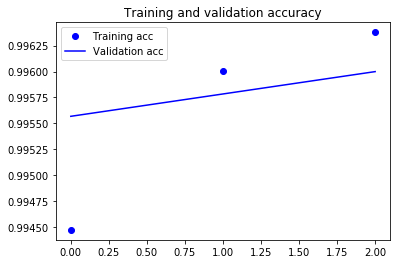

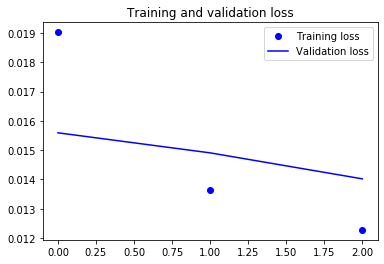

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()
    
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
    
    
Y_pred = model.predict(x_test_pad_matrix)
y_pred = np.argmax(Y_pred, axis=2)
print(y_pred)

cat_test_y=to_categorical(y_test_pad_matrix)
true_class = np.argmax(cat_test_y, 2)

print(true_class.shape)
print(true_class)

test_loss, test_acc = model.evaluate(x_test_pad_matrix, cat_test_y)
print('test acc:', test_acc)
print('test loss:', test_loss)


[[0 0 0 ... 0 0 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 0 9 2]
 ...
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 8 7]]
(3684, 150)
[[0 0 0 ... 0 0 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 0 8 8]
 ...
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 8 7]]
3684/3684 [==============================] - 2s 502us/step
test acc: 0.9957383275032043
test loss: 0.01481256097854478


## Evaluating your System
You will use the official script to evaluate the performance of your system

1. Use the predict method to predict the tags of the whole test set

2. Write your results in a file, where the two last columns will be the hand-annotated tag and the predicted tag. The fields must be separated by a space and each line must end with a new line: \n.

3. If you save your results on a Windows machine, Python will use the default end-of-line sequence: \r\n. You will then need either to convert your file or to modify the way you save your file.
4. Apply conlleval to your output. Report the F1 result.
    Be aware that conlleval was designed for Unix and will break with Windows end-of-line conventions.
5. Try to improve your model by modifying some parameters, adding layers, adding Bidirectional and Dropout.

6. Evaluate your network again


In [25]:
import numpy as np
print(y_pred)
f = open("predicted.txt", "w+")
for y in range(len(y_pred)):
    for x in range(len(y_pred[y])):
        if true_class[y][x] == 0:
            continue
        else:
            f.write(idx_ner[true_class[y][x]])
        f.write(" ")
                
        if y_pred[y][x] == 0:
            f.write('0')
        else:
            f.write(idx_ner[y_pred[y][x]])
                
        f.write("\n")
f.close()

print(y_pred.shape)
print(true_class.shape)

print(y_pred[1])
print(true_class[1])


# np.savetxt("predictions.txt", (y_pred, true_class), newline=" ",fmt="%d")


[[0 0 0 ... 0 0 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 0 9 2]
 ...
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 8 7]]
(3684, 150)
(3684, 150)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 9 7 7 7 7 9 7 7
 7 7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 9 7 7 7 7 8 7 7
 7 7]


## Building a LSTM Network

1. Create a simple LSTM network and train a model with the train set. As layers, you will use Embedding, LSTM, and Dense.
2. Apply conlleval to your output. Report the F1 result.
3. Try to improve your model by modifying some parameters, adding layers, adding Bidirectional, Dropout, possibly mixing SimpleRNN.
4. Apply your network to the test set and report the accuracy you obtained. you need to reach a F1 of 82 to pass.


In [51]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SpatialDropout1D
from keras.callbacks import ModelCheckpoint

lstm_model = Sequential() 
lstm_model.add(Embedding(len(union_vocab_set) + 2, 
                           100, 
                           mask_zero=True, 
                           input_length=None)) 

lstm_model.layers[0].set_weights([embedding_matrix]) 
lstm_model.layers[0].trainable = False 
lstm_model.add(SpatialDropout1D(0.2))
#model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(100, return_sequences=True))) 
lstm_model.add(Dense(10, activation='softmax')) 
lstm_model.summary()

lstm_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['acc'])



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         40259700  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, None, 100)         0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 200)         160800    
_________________________________________________________________
dense_8 (Dense)              (None, None, 10)          2010      
Total params: 40,422,510
Trainable params: 162,810
Non-trainable params: 40,259,700
_________________________________________________________________


In [52]:
cat_train_y = to_categorical(y_train_pad_matrix)
cat_val_y = to_categorical(y_val_pad_matrix)


history = lstm_model.fit(x_train_pad_matrix, cat_train_y,
                    epochs=10,
                    batch_size = 128,
                    validation_data = (x_val_pad_matrix, cat_val_y))

Train on 14987 samples, validate on 3466 samples
Epoch 1/10
14987/14987 [==============================] - 69s 5ms/step - loss: 0.0365 - acc: 0.8846 - val_loss: 0.0242 - val_acc: 0.9218
Epoch 2/10
14987/14987 [==============================] - 59s 4ms/step - loss: 0.0190 - acc: 0.9367 - val_loss: 0.0161 - val_acc: 0.9507
Epoch 3/10
14987/14987 [==============================] - 53s 4ms/step - loss: 0.0152 - acc: 0.9498 - val_loss: 0.0162 - val_acc: 0.9494
Epoch 4/10
14987/14987 [==============================] - 58s 4ms/step - loss: 0.0132 - acc: 0.9552 - val_loss: 0.0144 - val_acc: 0.9561
Epoch 5/10
14987/14987 [==============================] - 67s 4ms/step - loss: 0.0117 - acc: 0.9601 - val_loss: 0.0120 - val_acc: 0.9643
Epoch 6/10
14987/14987 [==============================] - 53s 4ms/step - loss: 0.0108 - acc: 0.9634 - val_loss: 0.0108 - val_acc: 0.9674
Epoch 7/10
14987/14987 [==============================] - 52s 3ms/step - loss: 0.0100 - acc: 0.9661 - val_loss: 0.0101 - val_acc:

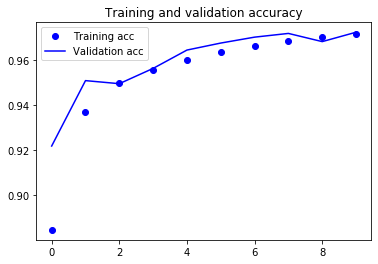

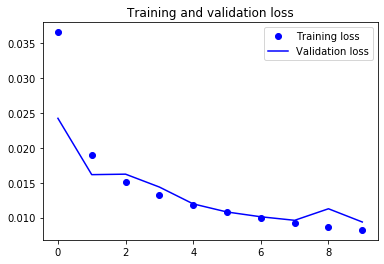

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()
    
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [54]:
    
    
Y_pred = lstm_model.predict(x_test_pad_matrix)
y_pred = np.argmax(Y_pred, axis=2)


cat_test_y=to_categorical(y_test_pad_matrix)
true_class = np.argmax(cat_test_y, 2)


test_loss, test_acc = lstm_model.evaluate(x_test_pad_matrix, cat_test_y)
print('test acc:', test_acc)
print('test loss:', test_loss)

3684/3684 [==============================] - 4s 1ms/step
test acc: 0.9656709432601929
test loss: 0.009874654798782365


In [55]:
print(y_pred)
f = open("predicted_lstm.txt", "w+")
for y in range(len(y_pred)):
    for x in range(len(y_pred[y])):
        if true_class[y][x] == 0:
            continue
        else:
            f.write(idx_ner[true_class[y][x]])
        f.write(" ")
                
        if y_pred[y][x] == 0:
            f.write('0')
        else:
            f.write(idx_ner[y_pred[y][x]])
                
        f.write("\n")
f.close()

[[7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [2 2 2 ... 2 8 2]
 ...
 [2 2 2 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 8 7]]
